## Imports

In [1]:
from constants import TRAIN_FC_FLUXES_PATH, \
                      TRAIN_FC_AMP_PHASE_PATH, \
                      VALIDATION_FC_FLUXES_PATH, \
                      VALIDATION_FC_AMP_PHASE_PATH

from data_utils import load_numpy_data
                    
from plot_utils import plot_map, \
                       plot_model_history, \
                       plot_fully_connected_amp_phase_prediction

from modeling_utils import create_fully_connected_architecture_for_amplitude_and_phase_reconstruction, \
                           compile_model, \
                           train_model, \
                           train_model_with_generator, \
                           store_model

from configurations import SimpleFCModel as ModelConfig

2024-02-19 09:45:03.468253: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-19 09:45:03.784648: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 09:45:03.784806: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 09:45:03.817874: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-19 09:45:03.907758: I tensorflow/core/platform/cpu_feature_guar

## Load data

In the first place, define the data paths

In [2]:
train_fluxes_array = load_numpy_data(f"{TRAIN_FC_FLUXES_PATH}00.npy")
validation_fluxes_array = load_numpy_data(VALIDATION_FC_FLUXES_PATH)

train_amp_phase_array = load_numpy_data(f"{TRAIN_FC_AMP_PHASE_PATH}00.npy")
validation_amp_phase_array = load_numpy_data(VALIDATION_FC_AMP_PHASE_PATH)

In [3]:
validation_amp_phase_array.shape

(10000, 2, 96, 96)

## Define configuration

In [4]:
model_configuration = ModelConfig()
print(model_configuration.get_description())


	=== NewFC10000-Processed ===
	*ARCHITECTURE HYPERPARAMETERS:
		-Fully Connected
		-Input shape: 1320
		-Output shape: (2, 96, 96)
		-Hidden layers: [2000, 2000, 2000, 2000]
		-Regularizer: None
		-Hidden Layers Activation: relu
		-Output Layer Activation: linear
		-Batch Normalization: False
		-Dropout: False, 0.2
	
	*COMPILATION HYPERPARAMETERS:
		-Optimizer: ADAM lr=0.001, beta_1=0.9, beta_2=0.999
		-Loss Function: MSE
		-Metric: MSE
	
	* TRAINING HYPERPARAMETERS:
		-Epochs: 200
		-Batch size: 64
		-Callbacks: 
			-ReduceLROnPlateau: MSE 10 x0.1
			-Early Stop: MSE 25
	


2024-02-19 09:45:11.122749: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-19 09:45:11.361793: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-19 09:45:11.362621: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## Instantiate model

In [5]:
model = create_fully_connected_architecture_for_amplitude_and_phase_reconstruction(
    *model_configuration.unpack_architecture_hyperparameters()
)


Model: "NewFC10000-Processed"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              2640000   
                                                                 
 activation (Activation)     (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 2000)              4000000   
                                                                 
 activation_1 (Activation)   (None, 2000)              0         
                                                                 
 dense_2 (Dense)             (None, 2000)              4000000   
                                                                 
 activation_2 (Activation)   (None, 2000)              0         
                                                                 
 dense_3 (Dense)             (None, 2000)     

## Compile model

In [6]:
compile_model(
    model,
    *model_configuration.unpack_compilation_hyperparameters()
)

## Train model

In [7]:
validation_amp_phase_array[0].shape

(2, 96, 96)

In [8]:
#history = train_model(model, 
#                      train_fluxes_array, 
#                      train_amp_phase_array, 
#                      validation_fluxes_array, 
#                      validation_amp_phase_array,
#                      *model_configuration.unpack_training_hyperparameters()
#                     )


In [9]:
history = train_model_with_generator(
    model,
    TRAIN_FC_FLUXES_PATH,
    TRAIN_FC_AMP_PHASE_PATH,
    validation_fluxes_array,
    validation_amp_phase_array,
    *model_configuration.unpack_training_hyperparameters(),
    n_samples=10000
)

Epoch 1/200


2024-02-19 09:45:13.849552: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-19 09:45:14.830587: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fcce246bc70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-19 09:45:14.830695: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-02-19 09:45:14.863315: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-19 09:45:14.966593: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708296315.264547   10118 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


157/157 [==============================] - 12s 52ms/step - loss: 0.2337 - mean_squared_error: 0.2337 - val_loss: 0.1852 - val_mean_squared_error: 0.1852 - lr: 0.0010
Epoch 2/200
157/157 [==============================] - 7s 44ms/step - loss: 0.1703 - mean_squared_error: 0.1703 - val_loss: 0.1622 - val_mean_squared_error: 0.1622 - lr: 0.0010
Epoch 3/200
157/157 [==============================] - 7s 44ms/step - loss: 0.1504 - mean_squared_error: 0.1504 - val_loss: 0.1463 - val_mean_squared_error: 0.1463 - lr: 0.0010
Epoch 4/200
157/157 [==============================] - 7s 43ms/step - loss: 0.1362 - mean_squared_error: 0.1362 - val_loss: 0.1349 - val_mean_squared_error: 0.1349 - lr: 0.0010
Epoch 5/200
157/157 [==============================] - 7s 43ms/step - loss: 0.1254 - mean_squared_error: 0.1254 - val_loss: 0.1273 - val_mean_squared_error: 0.1273 - lr: 0.0010
Epoch 6/200
157/157 [==============================] - 6s 41ms/step - loss: 0.1185 - mean_squared_error: 0.1185 - val_loss: 0.

## Results

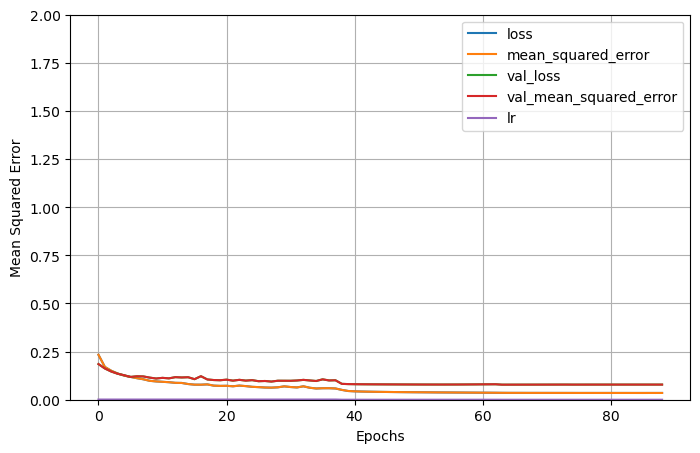

In [10]:
plot_model_history(history)

In [12]:
def plot_fully_connected_amp_phase_prediction(
    model,
    input_flux,
    original_amplitude,
    original_phase
    ):
    """
    Plots a 4 figure diagram with the predictions of the model

    Input:
        model (keras.models): A trained neural network
        input_flux (np.array): A data point to feed the neural network
        original_amplitude (np.array): Original 2d array containing the amplitude information in the pupil
        original_phase (np.array): Original 2d array containing the phase information in the pupil

    Returns:
        None
    """

    reshaped_input_flux = input_flux.reshape(1,len(input_flux))
    prediction = model.predict(reshaped_input_flux)
    amplitude_prediction = prediction[0][0]
    phase_prediction = prediction[0][1]

    plot_amp_phase_prediction(
        amplitude_prediction,
        phase_prediction,
        original_amplitude,
        original_phase,
        model.name
    )

In [13]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [50]:
def plot_amp_phase_prediction(
    predicted_amplitude,
    predicted_phase,
    original_amplitude,
    original_phase,
    model_name
    ):
    """
    Creates a four figure plot with the predicted and original maps of amplitude and phase

    Input:
        predicted_amplitude (np.array): The model amplitude map reconstruction
        predicted_phase (np.array): The model phase map reconstruction
        original_amplitude (np.array): The original amplitude map
        original_phase (np.array): The original phase map
 
    """
    # Create a subplot with 2 rows and 2 columns
    fig = make_subplots(rows=2, cols=3, subplot_titles=("Original Amplitude", "Reconstructed Amplitude", "Amplitude Residual", "Original Phase", "Reconstructed Phase", "Phase Residual"))


    og_amplitude_heatmap = go.Heatmap(
                                z=original_amplitude,
                                colorbar_x=-0.2, 
                                colorbar_y=0.8,
                                colorbar=dict(len=0.5))

    og_phase_heatmap = go.Heatmap(
                            z=original_phase, 
                            colorbar_x=-0.2, 
                            colorbar_y=0.2,
                            colorbar=dict(len=0.5))

    ai_amplitude_heatmap = go.Heatmap(
                                z=predicted_amplitude,
                                showscale=False)

    ai_phase_heatmap = go.Heatmap(
                            z=predicted_phase,
                            showscale=False)

    re_amplitude_heatmap = go.Heatmap(
                            z=original_amplitude - predicted_amplitude,
                            colorbar_y=0.8,
                            colorbar=dict(len=0.5))

    re_phase_heatmap = go.Heatmap(
                            z=original_phase - predicted_phase,
                            colorbar_y=0.2,
                            colorbar=dict(len=0.5))

    fig.add_trace(og_amplitude_heatmap, row=1, col=1)
    fig.add_trace(og_phase_heatmap, row=2, col=1)
    fig.add_trace(ai_amplitude_heatmap, row=1, col=2)
    fig.add_trace(ai_phase_heatmap, row=2, col=2)
    fig.add_trace(re_amplitude_heatmap, row=1, col=3)
    fig.add_trace(re_phase_heatmap, row=2, col=3)


    fig.update_layout(
    title_text=f"Amplitude and Phase Reconstruction from {model_name} model",
    height=800,  # Set the height of the figure
    width=1000    # Set the width of the figure
    )

    # Show the plot
    fig.show()

1/1 [==============================] - 0s 91ms/step


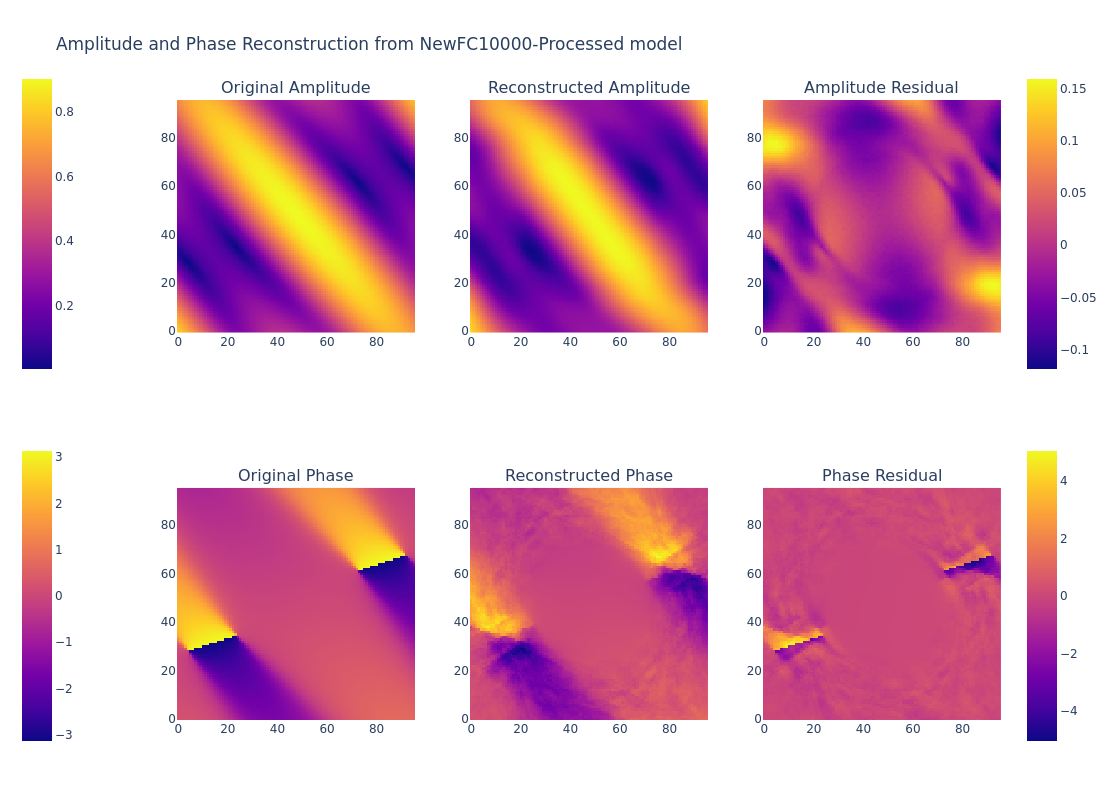

In [51]:
n = 106
plot_fully_connected_amp_phase_prediction(
    model,
    validation_fluxes_array[n],
    validation_amp_phase_array[n][0],
    validation_amp_phase_array[n][1]
    )

1/1 [==============================] - 0s 83ms/step


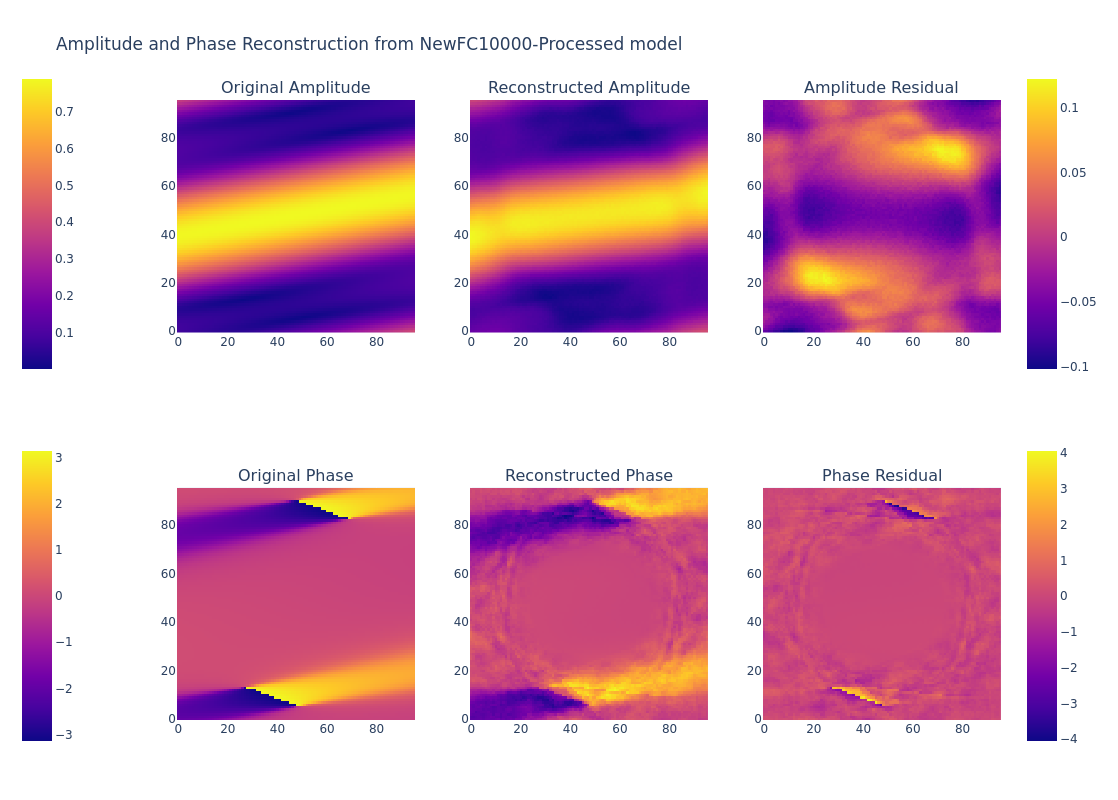

In [52]:
n = 106
plot_fully_connected_amp_phase_prediction(
    model,
    train_fluxes_array[n],
    train_amp_phase_array[n][0],
    train_amp_phase_array[n][1]
    )

In [53]:
store_model(model,
            model.name,
            model_configuration.get_description(),
            history.history['mean_squared_error'][-1],
            history.history['val_mean_squared_error'][-1])